In [1]:
from dataset import RolloutDataset

In [2]:
data_path = "datasets/WaterDrop"
rollout_dataset = RolloutDataset(data_path, "train")

In [9]:
max_n_particles = 0
for rollout in rollout_dataset:
    max_n_particles = max(max_n_particles, rollout["particle_type"].shape[0])
max_n_particles

1108

In [4]:
rollout_ex = rollout_dataset[0]
print(rollout_ex.keys())

dict_keys(['particle_type', 'position'])


In [7]:
rollout_ex["particle_type"].shape[0]

678

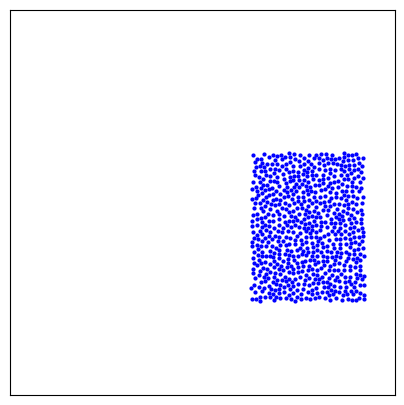

In [ ]:
from visualize import visualize_single
from IPython.display import display, HTML

anim = visualize_single(rollout_ex["particle_type"], rollout_ex["position"], rollout_dataset.metadata)
display(HTML(anim.to_html5_video()))

In [45]:
import random

idx = random.randint(0, len(rollout_dataset))
rollout_ex = rollout_dataset[idx]
position = rollout_ex["position"]
particle_type = rollout_ex["particle_type"]
print(idx, position.shape, particle_type.shape)

948 torch.Size([1001, 203, 2]) torch.Size([203])


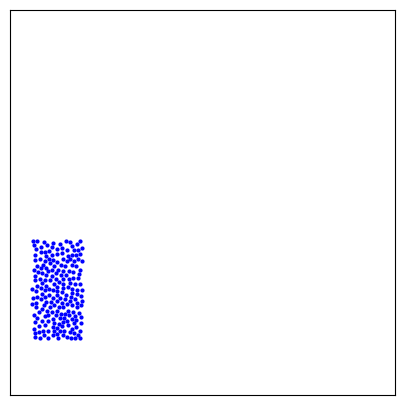

In [46]:
anim = visualize_single(particle_type, position, rollout_dataset.metadata)
display(HTML(anim.to_html5_video()))

In [11]:
import numpy as np

ds = np.load("datasets/mpm88/positions_train.npz")

In [62]:
ds.files

['arr_0',
 'arr_1',
 'arr_2',
 'arr_3',
 'arr_4',
 'arr_5',
 'arr_6',
 'arr_7',
 'arr_8',
 'arr_9']

In [ ]:
for k in ds:
    print(k, ds[k].shape)
    break

arr_0 (900, 784, 2)


In [78]:
import os
import json

for split in ["train", "valid", "test"]:
    ds = np.load(f"datasets/mpm88/positions_{split}.npz")

    data_shape = {}
    file_offset = {}
    i = 0
    for f in ds:
        sim = ds[f]
        data = {"particle_type": 5 * np.ones((sim.shape[1]), dtype=np.int64), "position": sim}
        shape = {}
        for key, value in data.items():
            filename = os.path.join("datasets/mpm88", split + "_" + key + ".dat")
            offset = file_offset.get(key, 0)
            if key == "particle_type":
                assert value.dtype == np.int64, value.dtype
            else:
                assert value.dtype == np.float32, value.dtype
            mode = "r+" if os.path.exists(filename) else "w+"
            array = np.memmap(
                filename,
                dtype=value.dtype,
                mode=mode,
                offset=offset * value.dtype.itemsize,
                shape=value.shape,
            )
            array[:] = value
            shape[key] = {"offset": offset, "shape": value.shape}
            file_offset[key] = offset + value.size
        data_shape[i] = shape
        i += 1
    with open(os.path.join("datasets/mpm88", split + "_offset.json"), "w") as f:
        json.dump(data_shape, f, indent=2)

In [79]:
bounds = [[0.0, 1.0], [0.0, 1.0]]
metadata = {"bounds": bounds}
 
with open(os.path.join("datasets/mpm88", "metadata.json"), "w") as f:
    json.dump(metadata, f, indent=2)

In [91]:
from dataset import RolloutDataset

data_path = "datasets/mpm88"
rollout_dataset = RolloutDataset(data_path, "train")

In [88]:
rollout_dataset

RolloutDataset(2)

In [89]:
from visualize import visualize_single

rollout_ex = rollout_dataset[1]
position = rollout_ex["position"]
particle_type = rollout_ex["particle_type"]
print(position.shape, particle_type.shape)

torch.Size([900, 426, 2]) torch.Size([426])


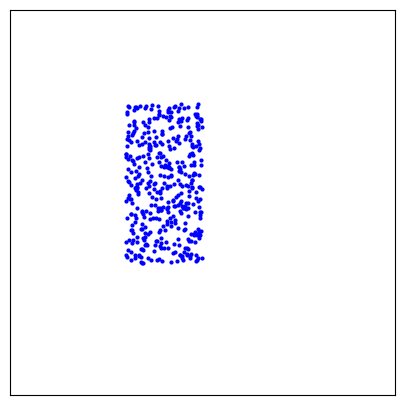

In [90]:
from IPython.display import display, HTML

anim = visualize_single(particle_type, position, rollout_dataset.metadata)
display(HTML(anim.to_html5_video()))

In [ ]:
ds = np.load("datasets/mpm88/positions_train.npz")

positions = []
for f in ds:
    positions.append(ds[f])

velocities = []
for i in range(1, len(positions)):
    velocities.append(positions[i][1:] - positions[i][:-1])

vel_mean = np.zeros((2), dtype=np.float64)
vel_std = np.zeros((2), dtype=np.float64)
for vel in velocities:
    vel_mean += vel.mean(axis=(0, 1))
    vel_std += vel.std(axis=(0, 1))
vel_mean /= len(velocities)
vel_std /= len(velocities)
vel_mean, vel_std

(array([ 0.00010304, -0.00052781]), array([0.00228994, 0.00287221]))

In [94]:
accelerations = []
for i in range(1, len(velocities)):
    accelerations.append(velocities[i][1:] - velocities[i][:-1])

acc_mean = np.zeros((2), dtype=np.float64)
acc_std = np.zeros((2), dtype=np.float64)
for acc in accelerations:
    acc_mean += acc.mean(axis=(0, 1))
    acc_std += acc.std(axis=(0, 1))
acc_mean /= len(accelerations)
acc_std /= len(accelerations)
acc_mean, acc_std

(array([-2.40373982e-08,  5.91814808e-06]), array([0.00020712, 0.00027505]))

In [95]:
metadata = {
    "bounds": [[0.0, 1.0], [0.0, 1.0]],
    "vel_mean": vel_mean.tolist(),
    "vel_std": vel_std.tolist(),
    "acc_mean": acc_mean.tolist(),
    "acc_std": acc_std.tolist(),
    "dim": 2,
    "sequence_length": 900,
    "default_connectivity_radius": 0.015,
}

In [96]:
with open(os.path.join("datasets/mpm88", "metadata.json"), "w") as f:
    json.dump(metadata, f, indent=2)

In [97]:
from dataset import OneStepDataset

In [98]:
onestep_ds = OneStepDataset(data_path, "train")

In [99]:
onestep_ds

OneStepDataset(8940)

In [100]:
onestep_ds[0]

Data(x=[784], edge_index=[2, 2968], edge_attr=[2968, 3], y=[784, 2], pos=[784, 14])

In [101]:

onestep_ds = OneStepDataset(data_path, "train")


In [102]:
onestep_ds[0]

Data(x=[1093], edge_index=[2, 3661], edge_attr=[3661, 3], y=[1093, 2], pos=[1093, 14])

In [103]:
rollout_dataset = RolloutDataset(data_path, "train")

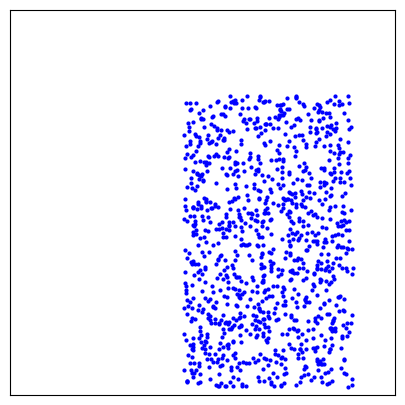

In [105]:
anim = visualize_single(rollout_dataset[0]["particle_type"], rollout_dataset[0]["position"], rollout_dataset.metadata)
display(HTML(anim.to_html5_video()))